## Redes Neuronales SOM

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
!pip show numpy

Name: numpy
Version: 1.25.2
Summary: Fundamental package for array computing in Python
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD-3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: albumentations, altair, arviz, astropy, autograd, blis, bokeh, bqplot, chex, cmdstanpy, contourpy, cudf-cu12, cufflinks, cupy-cuda12x, cvxpy, datascience, db-dtypes, dopamine_rl, ecos, flax, folium, geemap, gensim, gym, h5py, holoviews, hyperopt, ibis-framework, imageio, imbalanced-learn, imgaug, jax, jaxlib, librosa, lightgbm, matplotlib, matplotlib-venn, missingno, mizani, ml-dtypes, mlxtend, moviepy, music21, nibabel, numba, numexpr, opencv-contrib-python, opencv-python, opencv-python-headless, opt-einsum, optax, orbax-checkpoint, osqp, pandas, pandas-gbq, pandas-stubs, patsy, plotnine, prophet, pyarrow, pycocotools, pyerfa, pymc, pytensor, python-louvain, PyWavelets, qdldl, qudida, rmm-cu12, scikit-image, scikit-learn, sc

In [22]:
!pip show matplotlib

Name: matplotlib
Version: 3.7.1
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /usr/local/lib/python3.10/dist-packages
Requires: contourpy, cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: arviz, bigframes, datascience, fastai, geemap, imgaug, matplotlib-venn, missingno, mizani, mlxtend, music21, plotnine, prophet, pycocotools, seaborn, wordcloud, yellowbrick


#### Función de vecindad

In [2]:
def minimoNodo(data, t, pesos, m_rows, m_cols):
    result = (0,0)
    distanciaMinima = 1.0e20
    for i in range(m_rows):
        for j in range(m_cols):
            ed = euc_dist(pesos[i][j], data[t])
            if ed < distanciaMinima:
                distanciaMinima = ed
                result = (i, j)
    return result

#### Distancia euclidiana

In [3]:
def euc_dist(v1, v2):
    return np.linalg.norm(v1 - v2)

#### Manhattan para el rango el espacio de agrupación

In [4]:
def manhattan_dist(r1, c1, r2, c2):
    return np.abs(r1-r2) + np.abs(c1-c2)

#### Entrenamiento con SOM

In [19]:
def SOM():
    diminsion = 4
    Rows = 5; Cols = 5
    rangoMax = Rows + Cols
    factorAprendizaje = 0.5
    iteraciones = 1000
    archivo = "irisDataC.txt"

    # dataEntrenamiento = np.loadtxt(archivo, delimiter=",", usecols=range(0,4),dtype=int)
    # dataEntrenamiento = np.loadtxt(archivo, delimiter=",", usecols=range(0,4), converters={0: int, 1: int, 2: int, 3: int})
    dataEntrenamiento = np.loadtxt(archivo, delimiter=",", usecols=range(0,4)).astype(np.int64)

    salida = np.loadtxt(archivo, delimiter=",", usecols=[4],dtype=int)

    #Inicializando pesos
    pesos = np.random.randn(Rows, Cols,diminsion)
    for s in range(iteraciones):
        alfa = 1.0 - ((s * 1.0) / iteraciones)
        rangoActual = (int)(alfa * rangoMax)
        alfaActual = alfa * factorAprendizaje
        t = np.random.randint(len(dataEntrenamiento))
        (bmu_row, bmu_col) = minimoNodo(dataEntrenamiento, t, pesos, Rows, Cols)
        for i in range(Rows):
            for j in range(Cols):
                if manhattan_dist(bmu_row, bmu_col, i, j) < rangoActual:
                    pesos[i][j] = pesos[i][j] + alfaActual * (dataEntrenamiento[t] - pesos[i][j])
    for t in range(10):
        (bmu_row, bmu_col) = minimoNodo(dataEntrenamiento, t, pesos, Rows, Cols)
        print(t," ",bmu_row," ",bmu_col," ",pesos[bmu_row,bmu_col])

    #VISUALIZACIÓN
    print("Visualización")
    mapa = np.empty(shape=(Rows,Cols), dtype=int)
    for i in range(Rows):
        for j in range(Cols):
            mapa[i][j] = -1
    for t in range(len(dataEntrenamiento)):
        (m_row, m_col) = minimoNodo(dataEntrenamiento, t, pesos, Rows, Cols)
        mapa[m_row][m_col] = salida[t]
    print(mapa)
    plt.imshow(mapa)
    plt.colorbar()
    plt.show()


### Función principal

0   1   1   [4.99581320e+00 2.99987914e+00 1.00227658e+00 1.07780859e-03]
1   1   1   [4.99581320e+00 2.99987914e+00 1.00227658e+00 1.07780859e-03]
2   0   0   [4.03020726e+00 2.99999971e+00 1.00020265e+00 1.01183949e-04]
3   0   4   [5.0811076  2.00480941 3.99565871 0.99519059]
4   1   3   [5.93891815 2.00130914 4.08401725 0.9987008 ]
5   3   0   [6.01073708 3.         5.66747541 1.99575051]
6   4   4   [5.04021248 2.00037184 5.00021017 1.00037184]
7   4   1   [6.91116024 2.99921157 5.04542934 1.99921157]
8   3   3   [5.98025478 2.03278418 4.98888791 1.03278418]
9   2   0   [5.9915989  2.99997089 5.11914442 1.96655968]
Visualización
[[ 0 -1 -1 -1  1]
 [-1  0 -1  1 -1]
 [ 2 -1 -1 -1 -1]
 [ 2 -1 -1  2 -1]
 [-1  2 -1 -1  2]]


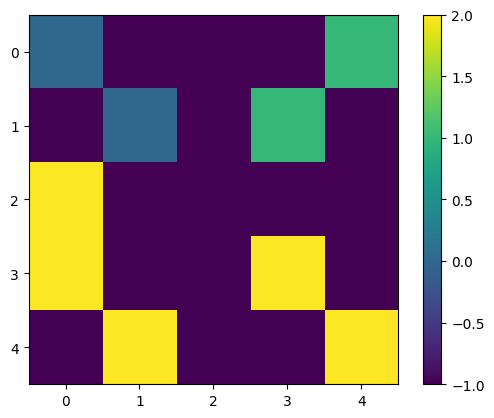

In [20]:
if __name__=="__main__":
  SOM()